# Task 2: Feed Forward Neural Networks

In this task, we attempt to immplement our own multilayer-preceptron and evaluate it on the MNIST dataset. 

In [1]:
from src.models.multi_layer_perceptron.mlp import MLP
from src.data.data_helpers import load_mnist
from src.models.multi_layer_perceptron.activations import ReLU, Softmax
from src.visualizations.dataset import plot_random_mnist_samples
from src.visualizations.evaluation import plot_confusion_matrix, plot_classification_metric_summary
from src.evaluation.model_evaluation import get_classification_metric_summary
import numpy as np


2024-02-07 08:21:58.717457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Loading

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(validation_size=0.20, OHE=True)

In [ ]:
# flatten arrays for mlp
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

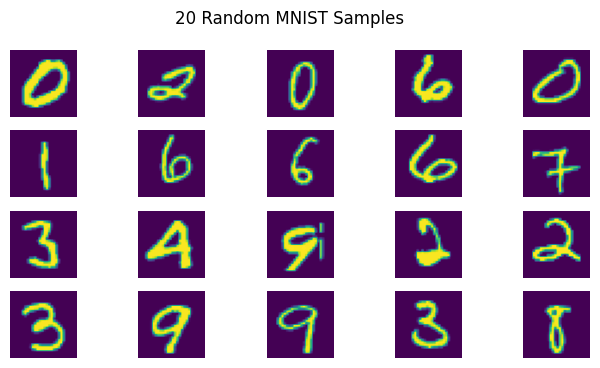

In [ ]:
plot_random_mnist_samples(X_train, 20)

## Network Training

In [ ]:
# configuration for the training of the MLP
config = {
    "lr": 0.001, # learning rate
    "batch_size": 64, # number of samples to run forward and backward propagation on at a time
    "epochs": 15, # number of training passes over the whole training data
    "validation_set": (X_val, y_val), # for hyperparameter tuning
    "lr_decay": 0.01, # allows for finer learning rate as we approach a minima
    "regularization_parameter": 0.01, # how much should the weight magnitude count towards the loss
}

model = MLP(
    input_feature_size=X_train.shape[1],
    layer_dimensions=[32, 32, 10],
    activations=[ReLU(), ReLU(), Softmax()],
    config=config,
)

[Epoch 15][Batch 750/750]: 100%|██████████| 750/750 [00:10<00:00, 73.17batch/s, loss=0.0627]


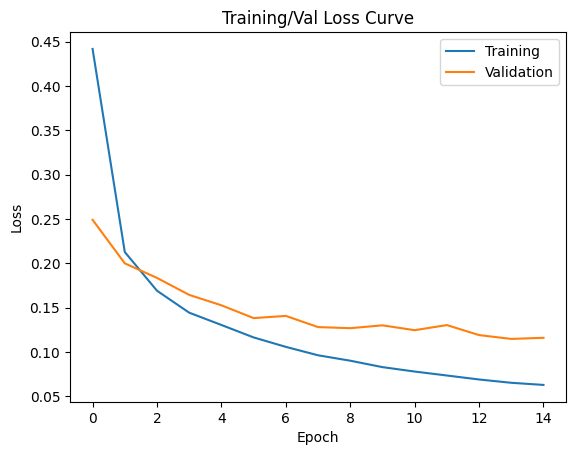

In [ ]:
model.train(X_train, y_train)

It can be seen from the loss curve that the model learns well as the loss decreases with each epoch.

## Network Evaluation

In [ ]:
y_test_pred_class = np.argmax(model(X_test), axis=1)
y_test_class = np.argmax(y_test, axis=1)

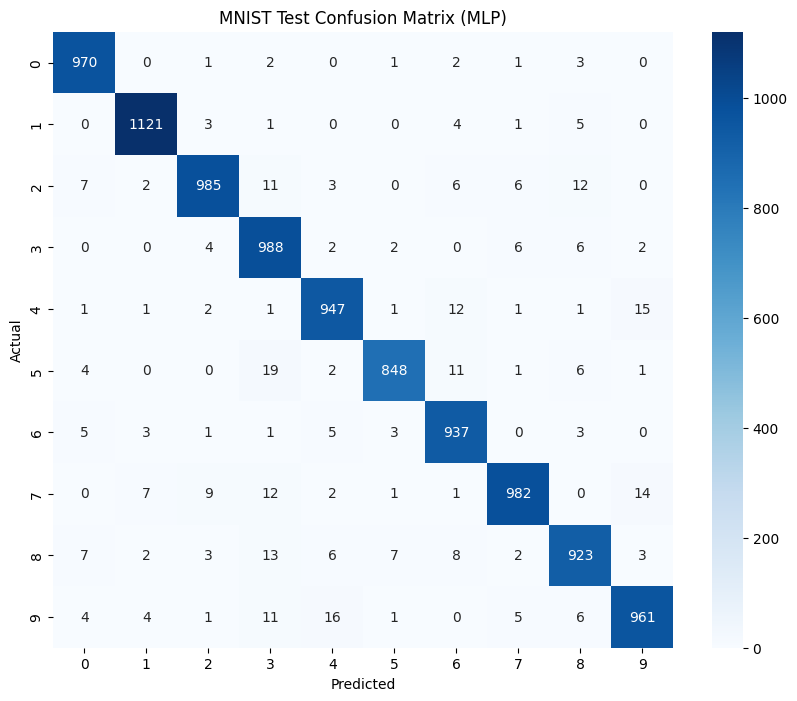

In [ ]:
plot_confusion_matrix(y_test_class, y_test_pred_class, "MNIST Test Confusion Matrix (MLP)")

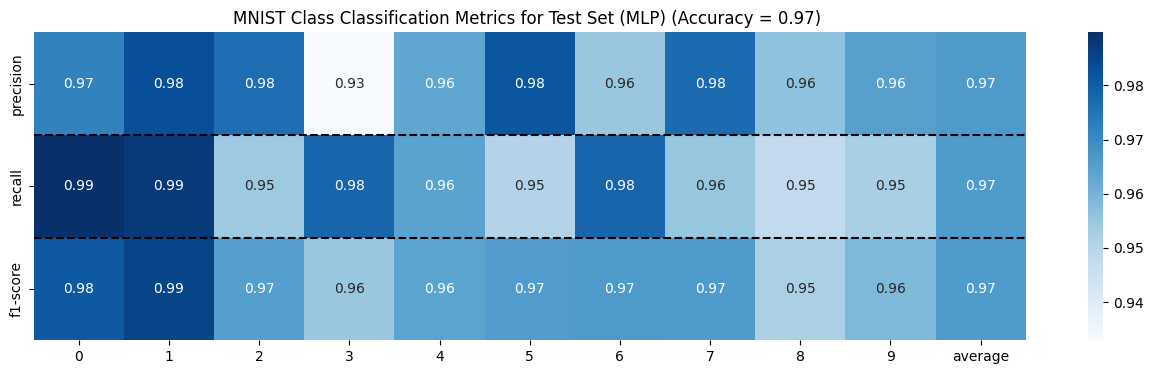

In [ ]:
class_metrics, accuracy = get_classification_metric_summary(y_test_class, y_test_pred_class)
plot_classification_metric_summary(class_metrics, f"MNIST Class Classification Metrics for Test Set (MLP) (Accuracy = {accuracy:.2f}) ")

The weakest precision seems to lie in class 3, as we seem to mistake other numbers with 3 more often than the opposite. Regarding the recall, multiple classes have similar recalls, this means that we don't always get these class samples right, as we classify them as something else. Overall, the average metrics are good at a 97% 